 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">TABLE OF CONTENTS</p>

- [Data Description](#1)

- [Import Data & Library](#2)

- [Data Understanding](#3)

- [Data Cleaning & Preparation](#4)

- [Feature Engineering](#5)

- [Exploratory Data Analysis](#6)

- [Feature Scaling](#7)

- [KMeans Clustering](#8)

- [Summary and Insights](#9)

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">DATA DESCRIPTION</p>

data source https://archive.ics.uci.edu/dataset/502/online+retail+ii

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">IMPORT DATA & LIBRARY</p>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name=0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">DATA UNDERSTANDING</p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


Unexepected negative values in quantity and price, Customer ID has some missing values

In [9]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [10]:
df[df['Customer ID'].isnull()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [11]:
df[df['Quantity']<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [12]:
# To check text variety in Invoice. 'C' indicating Cancellation
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [13]:
# To remove the digits from invoice. See if there is any other prefix other than 'C'
df['Invoice'].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [14]:
df[df['Invoice'].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Most probably accounting type transaction. Will be removed during cleaning

In [16]:
df['StockCode'] = df['StockCode'].astype('str')
df[df['StockCode'].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [17]:
df[
(df['StockCode'].str.match("^\\d{5}$") == False) & 
(df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)
]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


StockCodes have unexpected patterns

In [19]:
# Checking each unexpected unique StockCodes
df['StockCode'][
(df['StockCode'].str.match("^\\d{5}$") == False) & 
(df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)
].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

Notes : <br>
<br>
StockCode
* StockCode is meant to follow the pattern [0-9]{5} but seems to have other patterns [0-9]{5}[a-zA-Z]+ with legit transactions
* To summarize these StockCodes :
  | Code | Description                           | Action    |
  |------|---------------------------------------|-----------|
  |POST or DOT  | Has description as 'Postage'. Represent Postage fees | To be excluded from clustering |
  |D | Looks valid, represent discount values | Excluded from clustering |
  | DCGS | Looks valid, some quantities are negative and customer ID is null | Excluded from clustering |
  | M or m | Looks valid, represent manual transactions | Excluded from clustering |
  | C2 | Carriage transaction - not sure what this means | Excluded from clustering |
  | C3 | Only 1 transaction, not sure what it means | Excluded from clustering |
  | BANK CHARGES or B | Bank charges | Excluded from clustering |
  | S | Samples sent to customer | Excluded from clustering |
  | TESTXXX | Testing data, not valid | Excluded from clustering |
  | gift_XXX | Purchases with gift cards, might be interesting for another analysis, but no customer data | Excluded from clustering |
  | PADS | Looks like a legit stock code for padding | Include |
  | SP1002 | Looks like a special request item, only 2 transaction, 3 look legit, 1 has 0 pricing | Excluded from clustering |
  | AMAZONFEE | Looks like fees for Amazon shipping | Excluded from clustering |
  | ADJUSTX | Looks like manual account adjustment by admins | Excluded from clustering |
  

In [21]:
unique_code = df['StockCode'][
(df['StockCode'].str.match("^\\d{5}$") == False) & 
(df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)
].unique()

for code in unique_code:
    print(df[df['StockCode'].str.contains(code)].head(),"\n")

     Invoice StockCode Description  Quantity         InvoiceDate   Price  \
89    489439      POST     POSTAGE         3 2009-12-01 09:28:00   18.00   
126   489444      POST     POSTAGE         1 2009-12-01 09:55:00  141.00   
173   489447      POST     POSTAGE         1 2009-12-01 10:10:00  130.00   
625   489526      POST     POSTAGE         6 2009-12-01 11:50:00   18.00   
927  C489538      POST     POSTAGE        -1 2009-12-01 12:18:00    9.58   

     Customer ID         Country  
89       12682.0          France  
126      12636.0             USA  
173      12362.0         Belgium  
625      12533.0         Germany  
927      15796.0  United Kingdom   

     Invoice StockCode                       Description  Quantity  \
197  C489459    90200D          PINK SWEETHEART BRACELET        -3   
204  C489459    90003D    CRYSTAL PAIR HEART HAIR SLIDES        -3   
208  C489459    90082D  DIAMANTE BOW BROOCH BLACK COLOUR        -2   
244   489462    90200D          PINK SWEETHEART BRA

In [22]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [23]:
df['Country'].value_counts()

Country
United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76


In [24]:
df[df['Description'].isnull()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom


 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">DATA CLEANING AND PREPARATION</p>

In [26]:
cleaned_df = df.copy()

In [27]:
# Only taking Invoice with 6 digit patterns
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype(str)

mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [28]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype(str)

mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True) | 
    (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (cleaned_df['StockCode'].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [29]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512796.000000,512796,512796.000000,406337.000000
mean,11.001279,2010-06-28 18:26:52.709732352,3.391447,15373.632992
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-21 13:27:00,1.250000,14004.000000
50%,3.000000,2010-07-06 14:25:00,2.100000,15326.000000
75%,10.000000,2010-10-15 14:50:00,4.210000,16814.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,104.352433,NaN,5.067864,1677.365907


In [30]:
cleaned_df.dropna(subset='Customer ID', inplace = True)

In [31]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [32]:
cleaned_df[cleaned_df['Price']==0].shape[0]

28

In [33]:
cleaned_df = cleaned_df[cleaned_df['Price']> 0.0 ]

In [34]:
cleaned_df['Price'].min()

0.001

In [35]:
len(cleaned_df) / len(df)

0.7732429238325965

Dropped 23% of original records

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">FEATURE ENGINEERING</p>

Adding a few more features to the dataset before continue to EDA. MonetoryValue, Recency, Frequency

In [39]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [40]:
aggregated_df = cleaned_df.groupby(by='Customer ID', as_index=False) \
    .agg(
        MonetaryValue=('SalesLineTotal','sum'),
        Frequency=('Invoice','nunique'),
        LastInvoiceDate=('InvoiceDate','max')
    )
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [41]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [42]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">EXPLORATORY DATA ANALYSIS</p>

In [80]:
aggregated_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,4285.000000,4285.000000,4285.000000,4285,4285.000000
mean,15356.806768,2024.126801,4.426138,2010-09-11 00:06:10.431738624,89.548191
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13891.000000,307.560000,1.000000,2010-07-27 14:39:00,17.000000
50%,15362.000000,702.900000,2.000000,2010-10-19 12:10:00,51.000000
75%,16840.000000,1704.290000,5.000000,2010-11-22 11:24:00,135.000000
max,18287.000000,349164.350000,183.000000,2010-12-09 20:01:00,373.000000
std,1699.839258,8813.945538,7.938017,NaN,96.359872


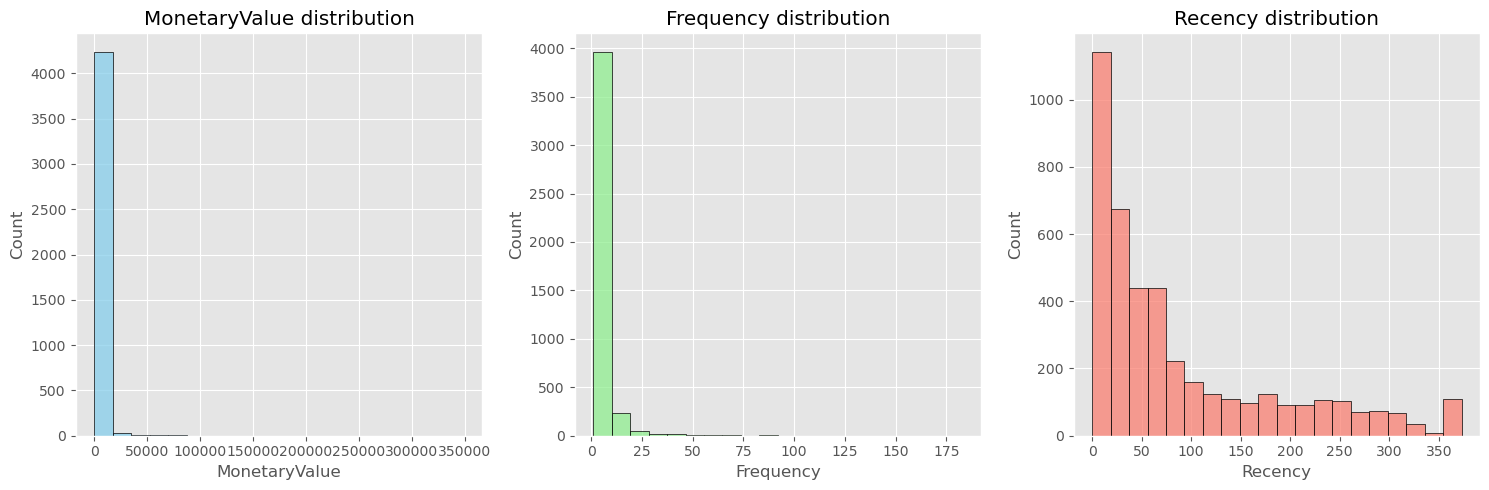

In [44]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

cols = ['MonetaryValue','Frequency','Recency']
color = ['skyblue','lightgreen','salmon']

for i, col in enumerate(cols):
    sns.histplot(data=aggregated_df, x=col, 
                 color=color[i],edgecolor='black', 
                 bins= 20, ax=ax[i])
    ax[i].set_title(f'{col} distribution')
plt.tight_layout()
plt.show()

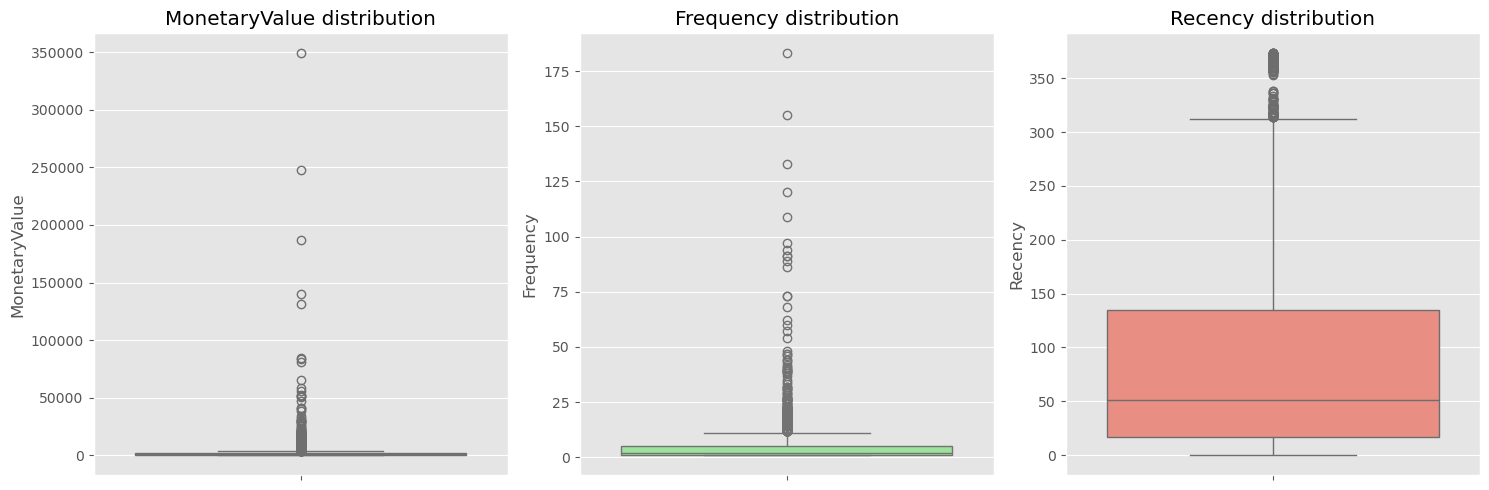

In [86]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

cols = ['MonetaryValue','Frequency','Recency']
color = ['skyblue','lightgreen','salmon']

for i, col in enumerate(cols):
    sns.boxplot(data=aggregated_df, y=col, 
                 color=color[i], ax=ax[i])
    ax[i].set_title(f'{col} distribution')
plt.tight_layout()
plt.show()

In [88]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q1 - M_Q1

monetary_outliers = aggregated_df[(aggregated_df['MonetaryValue']>(M_Q3+(1.5*M_IQR)))].copy()
monetary_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,1071.000000,1071.000000,1071.000000,1071,1071.000000
mean,15190.176471,6320.148871,10.735761,2010-11-01 10:06:40.448178944,38.132586
min,12349.000000,1705.550000,1.000000,2009-12-10 18:03:00,0.000000
25%,13720.500000,2241.340000,5.000000,2010-10-18 13:29:30,7.000000
50%,15150.000000,3096.140000,7.000000,2010-11-19 11:48:00,20.000000
75%,16588.000000,5190.935000,12.000000,2010-12-02 15:08:00,52.000000
max,18287.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1698.796539,16906.616688,13.681088,NaN,51.061363


In [90]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q1 - F_Q1

frequency_outliers = aggregated_df[(aggregated_df['Frequency']>(F_Q3+(1.5*F_IQR)))].copy()
frequency_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,924.000000,924.000000,924.000000,924,924.000000
mean,15394.520563,6410.197411,12.609307,2010-11-11 11:29:01.038960896,28.077922
min,12359.000000,97.400000,6.000000,2010-01-22 11:28:00,0.000000
25%,13982.750000,1967.332500,7.000000,2010-11-07 16:19:15,4.000000
50%,15370.500000,2968.025000,9.000000,2010-11-25 13:04:00,14.000000
75%,16839.500000,5253.967500,13.000000,2010-12-05 11:46:30,32.000000
max,18283.000000,349164.350000,183.000000,2010-12-09 19:32:00,321.000000
std,1659.477124,18161.694582,14.177713,NaN,40.807510


In [98]:
non_outliers_df = aggregated_df[
(~aggregated_df.index.isin(monetary_outliers.index)) &
(~aggregated_df.index.isin(frequency_outliers.index)) 
]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3036.000000,3036.000000,3036.000000,3036,3036.000000
mean,15396.051383,554.871819,2.017128,2010-08-20 19:00:56.897233152,110.759223
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13938.500000,230.347500,1.000000,2010-06-10 10:41:45,28.750000
50%,15404.500000,432.080000,2.000000,2010-10-01 15:24:30,69.000000
75%,16892.250000,791.045000,3.000000,2010-11-10 20:48:15,182.000000
max,18286.000000,1704.290000,5.000000,2010-12-09 20:01:00,373.000000
std,1701.031854,410.021279,1.182953,NaN,102.449893


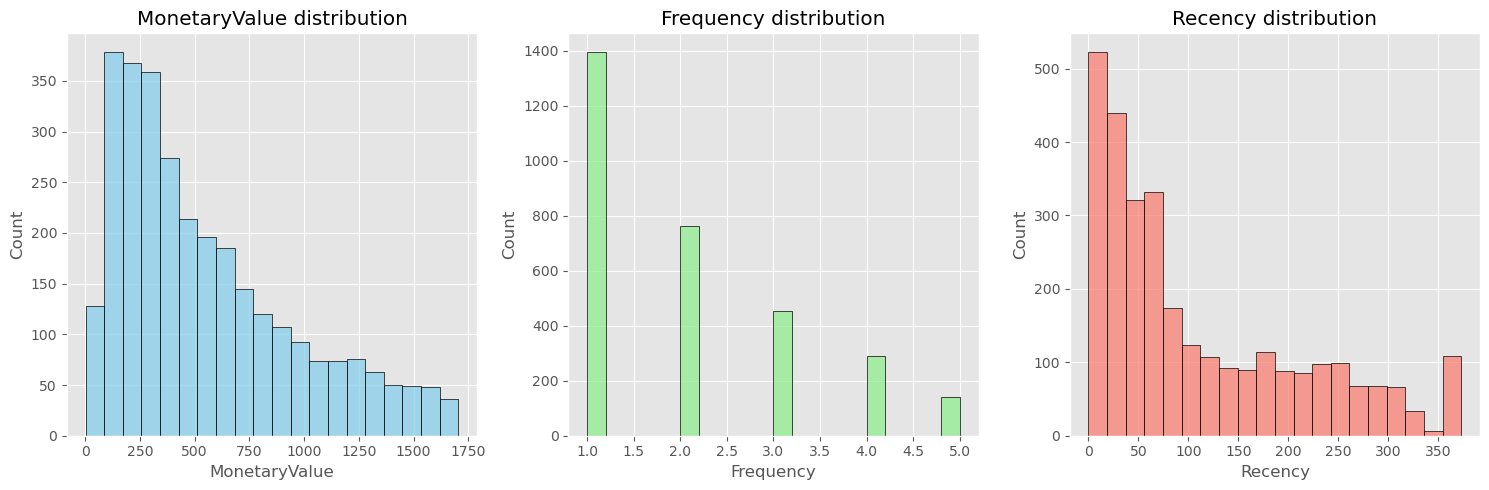

In [100]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

cols = ['MonetaryValue','Frequency','Recency']
color = ['skyblue','lightgreen','salmon']

for i, col in enumerate(cols):
    sns.histplot(data=non_outliers_df, x=col, 
                 color=color[i],edgecolor='black', 
                 bins= 20, ax=ax[i])
    ax[i].set_title(f'{col} distribution')
plt.tight_layout()
plt.show()

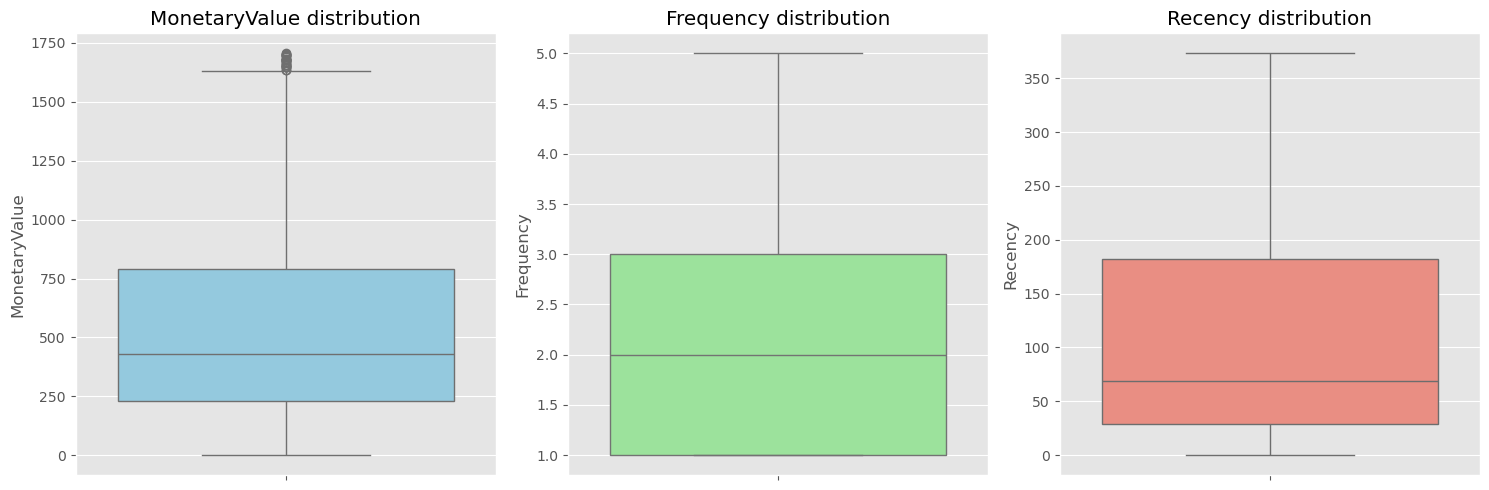

In [102]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

cols = ['MonetaryValue','Frequency','Recency']
color = ['skyblue','lightgreen','salmon']

for i, col in enumerate(cols):
    sns.boxplot(data=non_outliers_df, y=col, 
                 color=color[i], ax=ax[i])
    ax[i].set_title(f'{col} distribution')
plt.tight_layout()
plt.show()

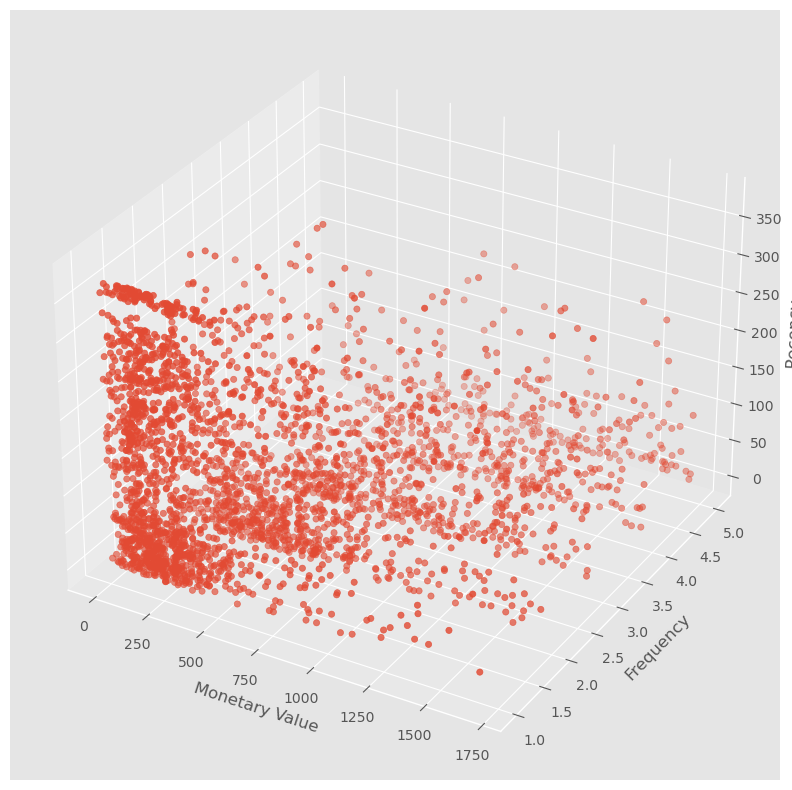

In [116]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                    non_outliers_df['Frequency'],
                    non_outliers_df['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.tight_layout()
plt.show()

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">FEATURE SCALING</p>

Apply standard scaling to transform the features to have a mean 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis. <br>
$$z = \frac{x - \mu}{\sigma}$$ <br>
Where : 
* z is the standardized value
* x is the original value
* \mu is the mean of the feature
* \sigma is the standard deviation of the feature

In [131]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue','Frequency','Recency']])
scaled_data

array([[-0.94037882, -0.01448124,  0.51976187],
       [ 1.87447532, -0.01448124, -1.06175942],
       [-0.8140231 , -0.85996284, -0.36862355],
       ...,
       [-0.34928774, -0.85996284, -0.43696089],
       [-0.43388265, -0.85996284,  1.79864637],
       [ 1.68691758, -0.01448124,  0.00235058]])

In [141]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=['MonetaryValue','Frequency','Recency'])
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.940379,-0.014481,0.519762
1,1.874475,-0.014481,-1.061759
2,-0.814023,-0.859963,-0.368624
4,-0.619440,-0.859963,-0.983660
5,-0.514867,-0.014481,-0.983660
...,...,...,...
4278,-0.603292,-0.859963,-0.798173
4279,-1.060002,-0.859963,0.988361
4281,-0.349288,-0.859963,-0.436961
4282,-0.433883,-0.859963,1.798646


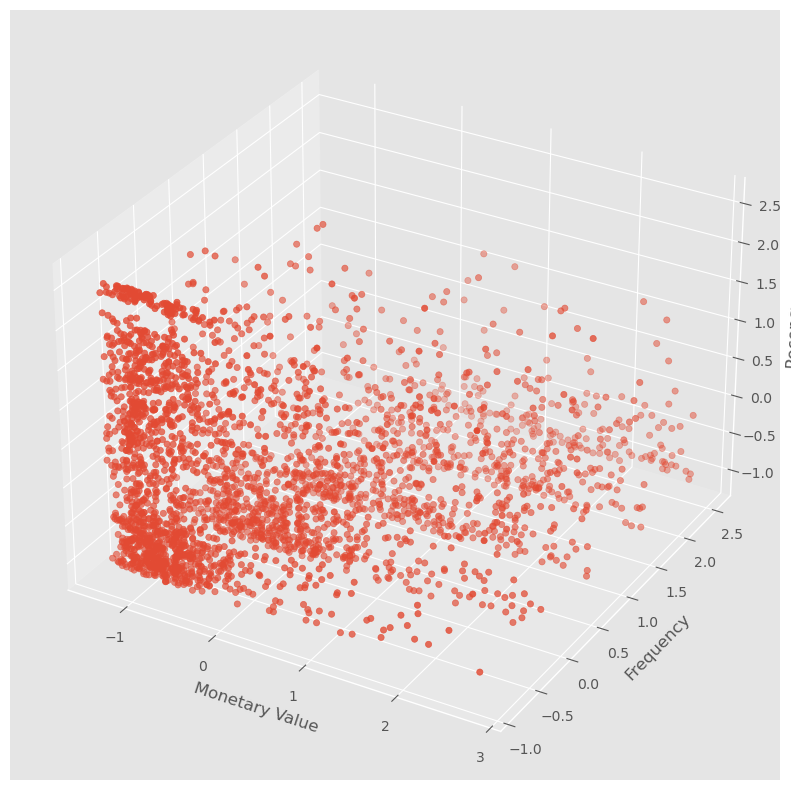

In [143]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(scaled_data_df['MonetaryValue'],
                    scaled_data_df['Frequency'],
                    scaled_data_df['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.tight_layout()
plt.show()

 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">KMEANS CLUSTERING</p>

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_k

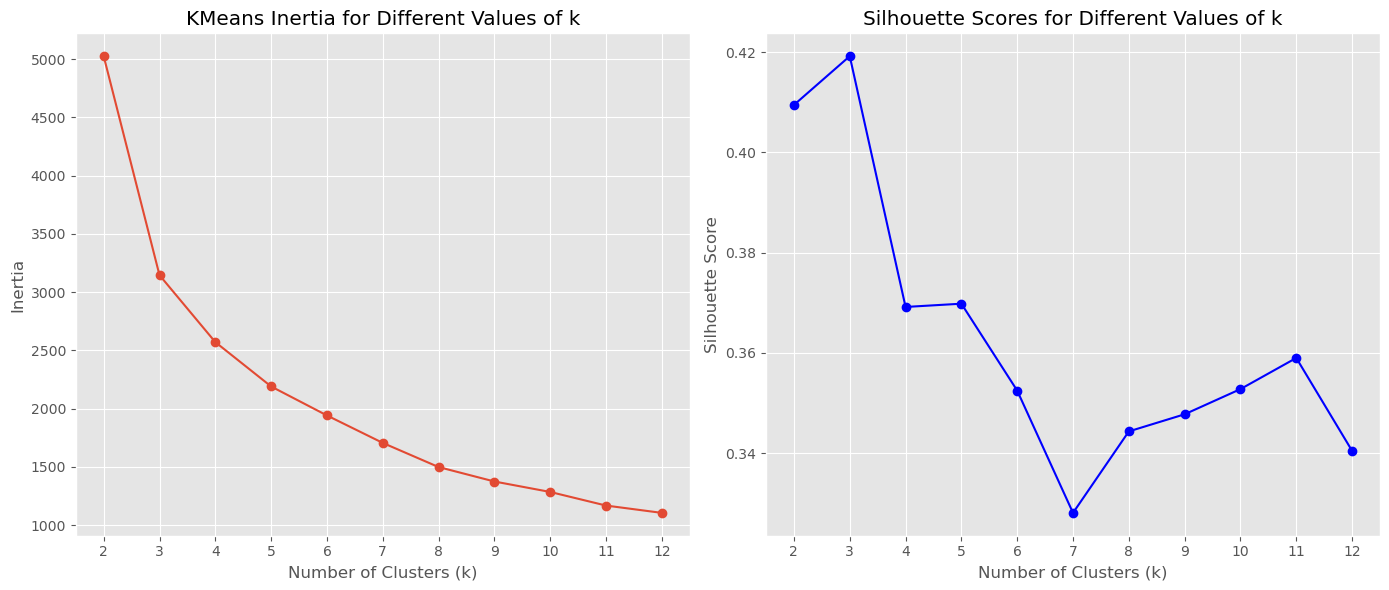

In [160]:
# looking for the elbow
max_k = 12
inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

# Plot inertia
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='blue')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

### Silhouette Score <br>
$$s(i) = \frac{b(i)-a(i)}{max(a(i),b(i))}$$ <br>
Where : 
* s(i) is the silhouette score for a single sample i
* a(i) is the average distance between i and all other points in the same cluster
* b(i) is the minimum average distance between i and all points in the nearest cluster to which i not belong. <br>

The silhoutte score ranges between [-1,1], a higher value indicates more distinct clusters

In [162]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 0, ..., 0, 3, 2])

In [164]:
non_outliers_df['Cluster']= cluster_labels
non_outliers_df

C:\Users\User\AppData\Local\Temp\ipykernel_1400\3470492757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster']= cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,3
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,0
5,12352.0,343.80,2,2010-11-29 10:07:00,10,0
...,...,...,...,...,...,...
4278,18280.0,307.55,1,2010-11-10 15:51:00,29,0
4279,18281.0,120.32,1,2010-05-11 10:49:00,212,3
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,0
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,3


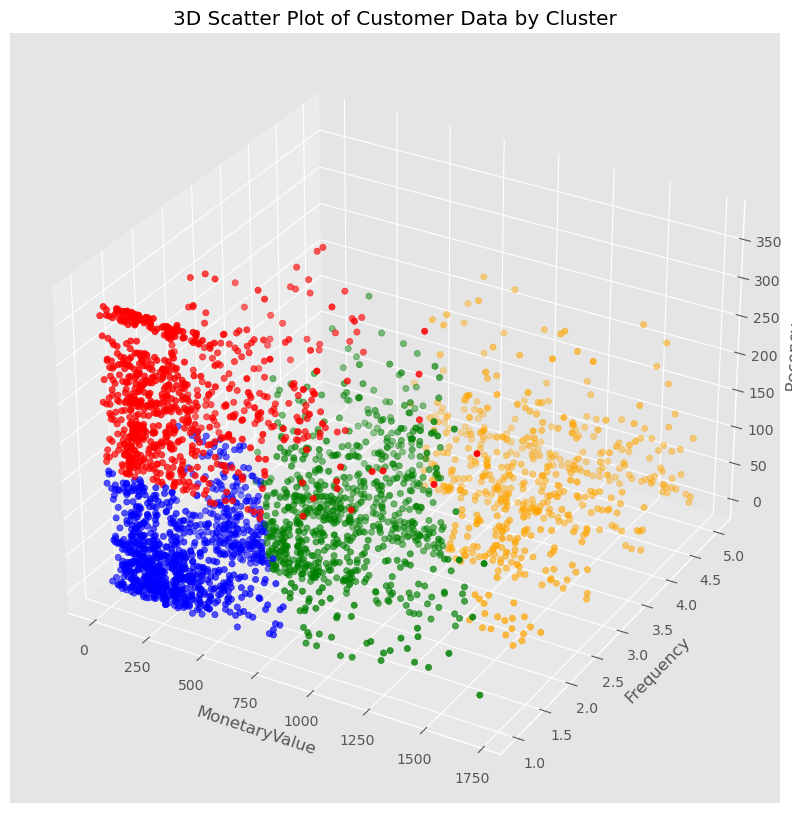

In [170]:
cluster_colors = {0:'blue',
                 1:'orange',
                 2:'green',
                 3:'red'}
colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                    non_outliers_df['Frequency'],
                    non_outliers_df['Recency'],
                    c=colors,
                    marker='o')
ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')
plt.show()

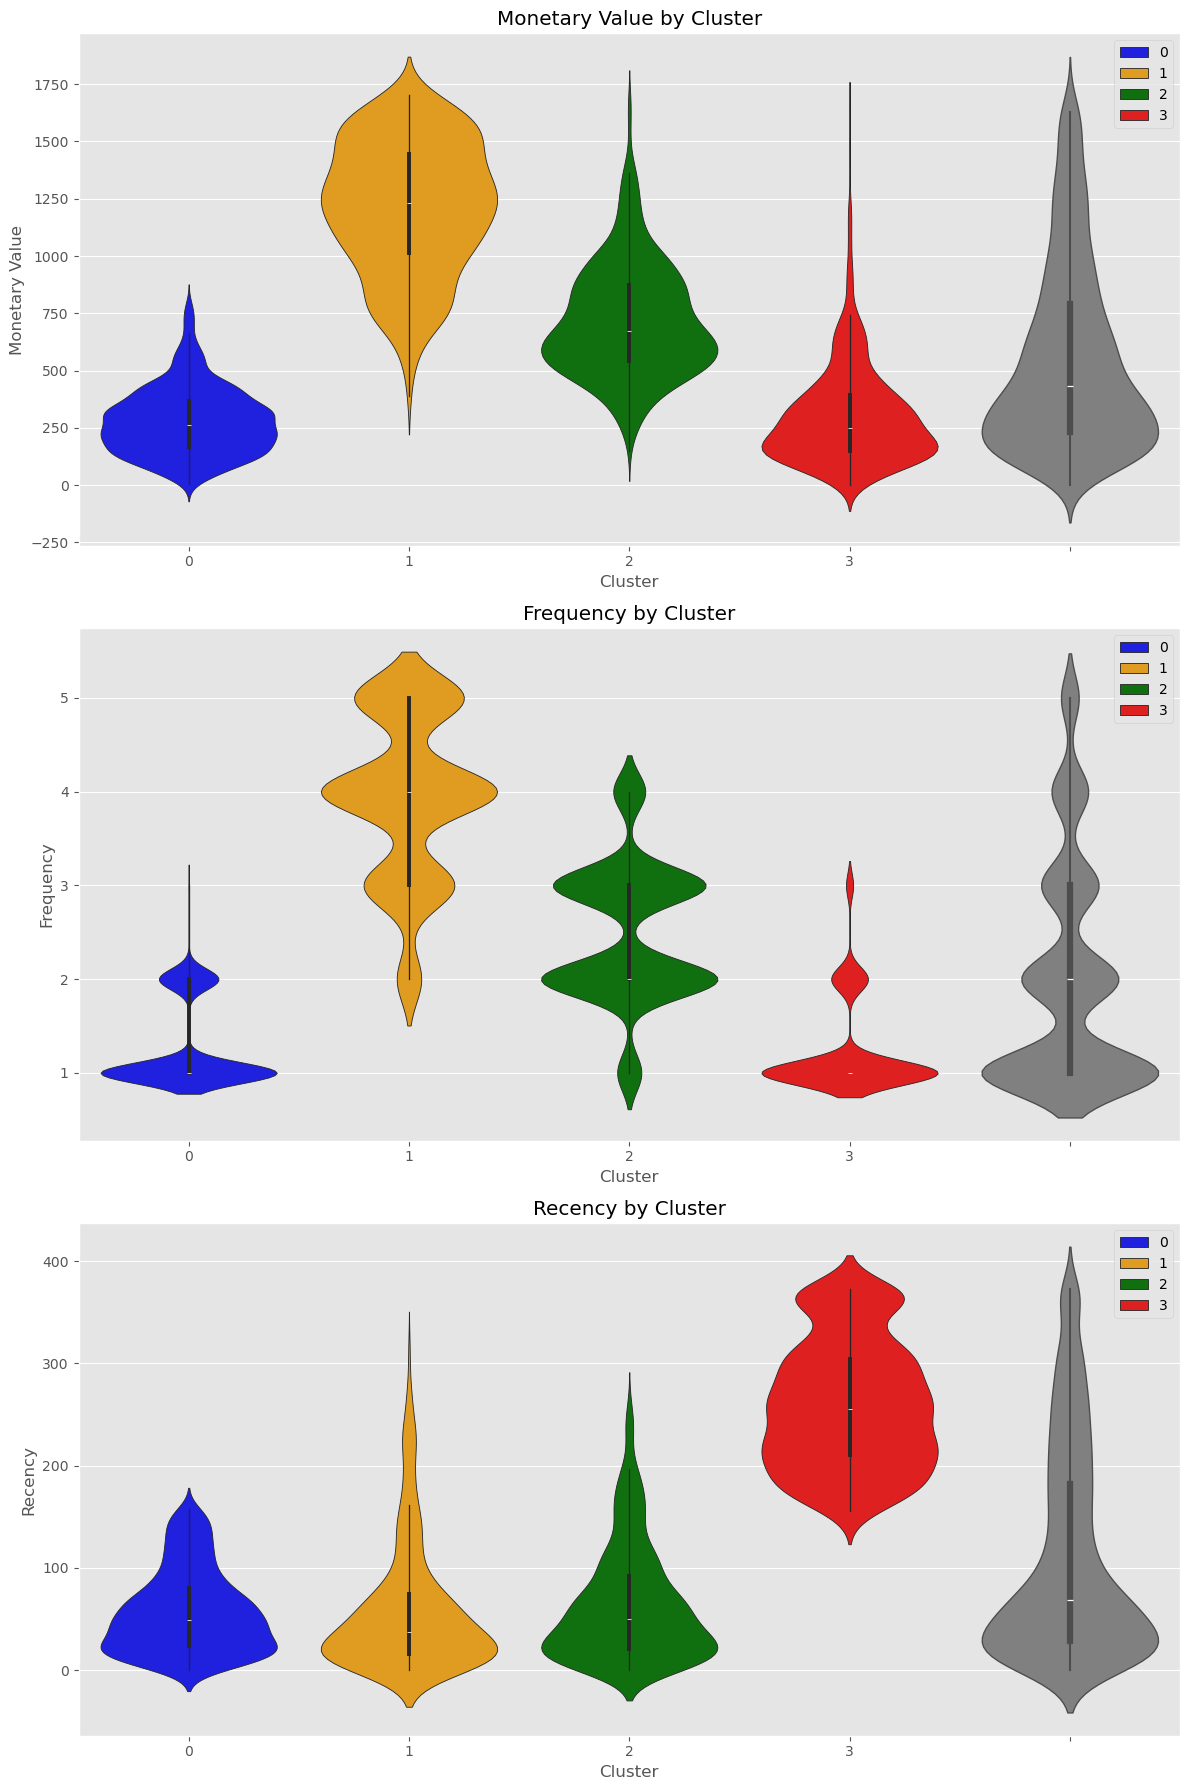

In [180]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'],
               y=non_outliers_df['MonetaryValue'],
               palette=cluster_colors,
               hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['MonetaryValue'],color='gray',linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['Cluster'],
               y=non_outliers_df['Frequency'],
               palette=cluster_colors,
               hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequency'],color='gray',linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['Cluster'],
               y=non_outliers_df['Recency'],
               palette=cluster_colors,
               hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'],color='gray',linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue) : 'Nurture'

* Rationale : This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action : Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

2. Cluster 1 (Orange) : 'Reward'

* Rationale : This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action : Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

3. Cluster 2 (Green) : 'Retain' 

* Rationale : This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action : Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

4. Cluster 3 (Red) : 'Re-Engage'

* Rationale : This group includes lower-value, infrequent buyers who haven't purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action : Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again

#### Summary of Cluster Names :
* Cluster 0 (Blue) : 'Nurture'
* Cluster 1 (Orange) : 'Reward'
* Cluster 2 (Green) : 'Retain'
* Cluster 3 (Red) : 'Re-Engage'


 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">KMEANS CLUSTERING (from outlier data)</p>

In [190]:
overlap_indices = monetary_outliers.index.intersection(frequency_outliers.index)

monetary_only_outliers = monetary_outliers.drop(overlap_indices)
frequency_only_outliers = frequency_outliers.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers,
                                frequency_only_outliers,
                                monetary_and_frequency_outliers])
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,-1
8,12356.0,3126.25,3,2010-11-24 12:24:00,15,-1
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
10,12358.0,2519.01,3,2010-11-29 10:56:00,10,-1
18,12371.0,1819.42,3,2010-10-26 13:37:00,44,-1
...,...,...,...,...,...,...
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3
4250,18245.0,3757.92,13,2010-11-25 16:52:00,14,-3
4253,18251.0,21964.14,8,2010-09-20 13:26:00,80,-3
4260,18258.0,2059.67,6,2010-09-01 14:20:00,99,-3


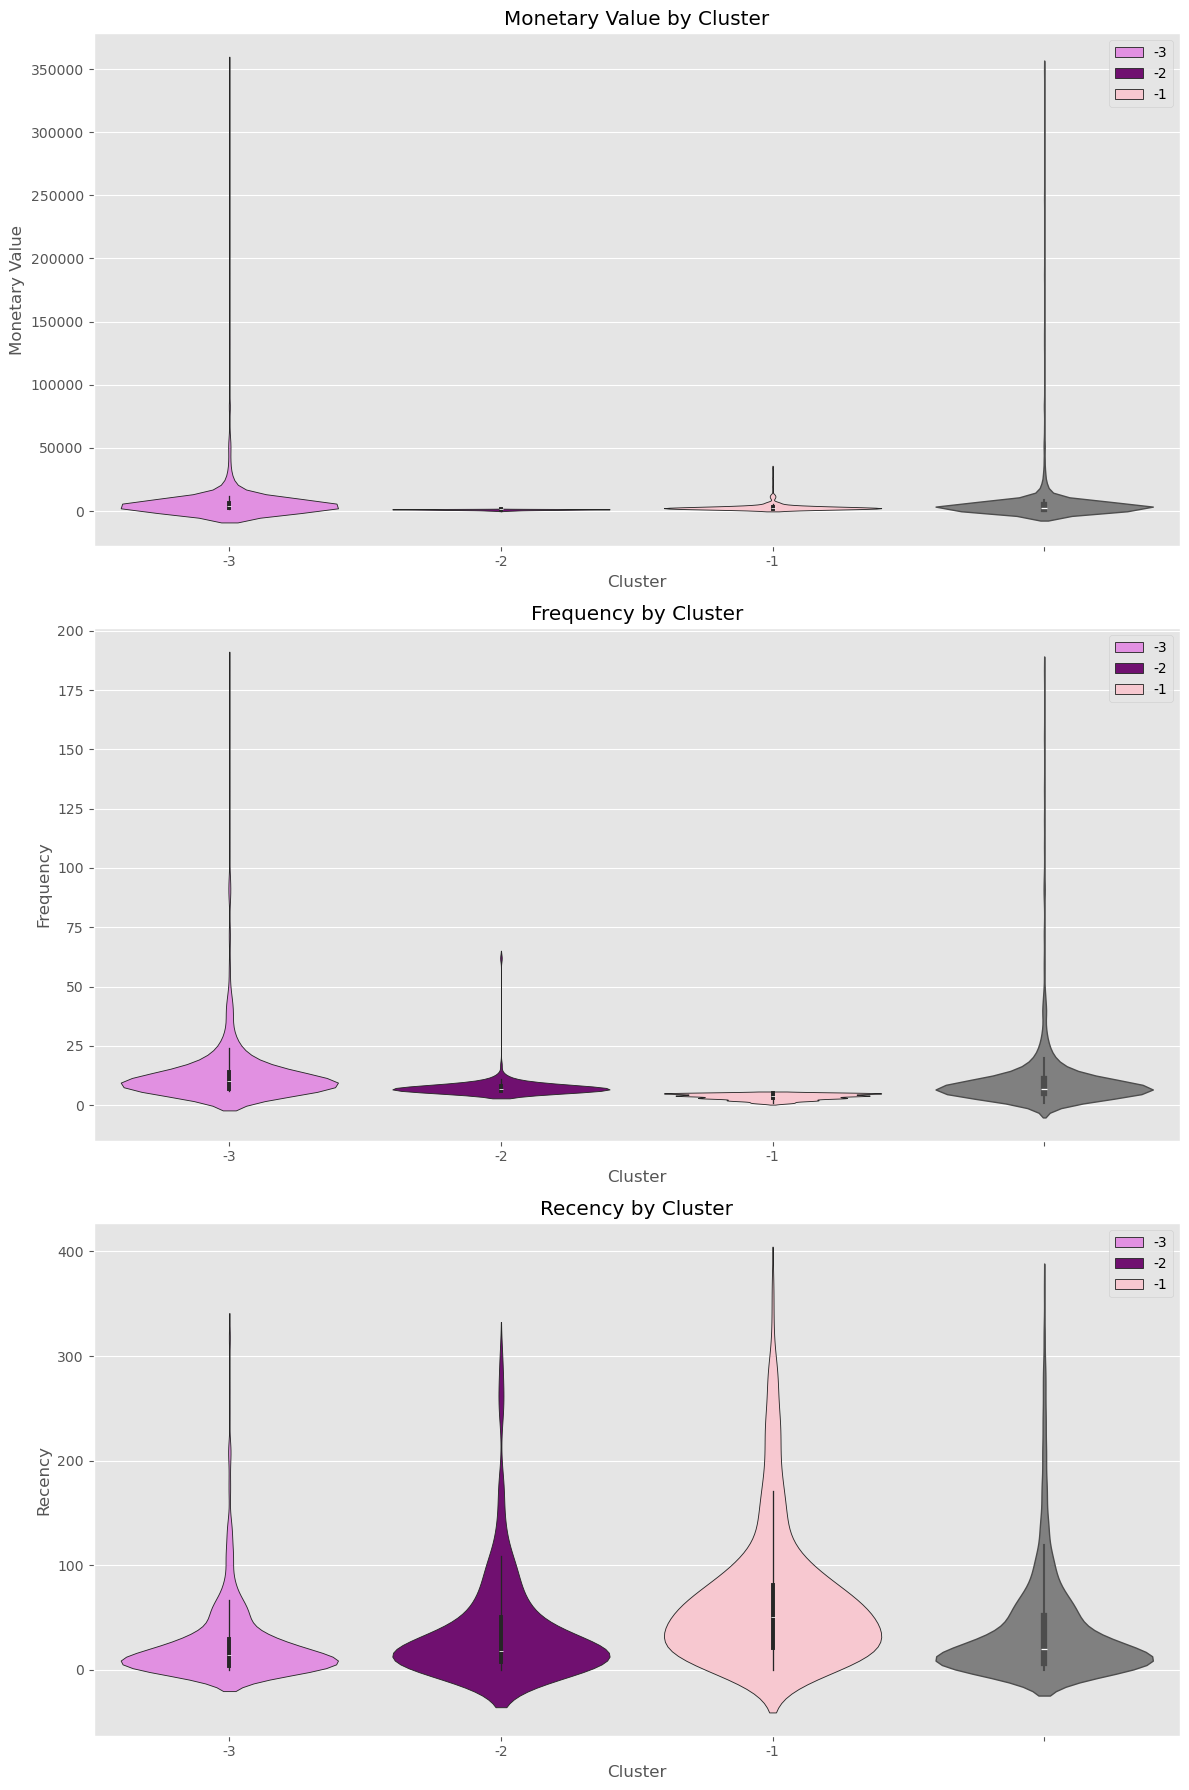

In [192]:
cluster_colors = {-1:'pink',
                 -2:'purple',
                 -3:'violet'}

plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outlier_clusters_df['Cluster'],
               y=outlier_clusters_df['MonetaryValue'],
               palette=cluster_colors,
               hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'],color='gray',linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=outlier_clusters_df['Cluster'],
               y=outlier_clusters_df['Frequency'],
               palette=cluster_colors,
               hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Frequency'],color='gray',linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outlier_clusters_df['Cluster'],
               y=outlier_clusters_df['Recency'],
               palette=cluster_colors,
               hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Recency'],color='gray',linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster -1 (Monetary Outliers) (Pink) : 'Pamper'

* Characteristics : High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
* Potential Strategy : Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

2. Cluster -2 (Frequency Outliers) (Purple) : 'Upsell'

* Characteristics : Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
* Potential Strategy : Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement

3. Cluster -3 (Monetary & Monetary Outliers) (Magenta) : 'Delight' 

* Characteristics : The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
* Potential Strategy : Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.


#### Summary of outliers Cluster Names :
* Cluster -1 (Pink) : 'Pamper'
* Cluster -2 (Purple) : 'Upsell'
* Cluster -3 (Magenta) : 'Delight'

In [198]:
cluster_labels = {
    0:'Nurture',
    1:'Reward',
    2:'Retain',
    3:'Re-Engage',
    -1:'Pamper',
    -2:'Upsell',
    -3:'Delight'
}



In [200]:
full_clustering_df = pd.concat([non_outliers_df,outlier_clusters_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,3
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,0
5,12352.0,343.80,2,2010-11-29 10:07:00,10,0
...,...,...,...,...,...,...
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3
4250,18245.0,3757.92,13,2010-11-25 16:52:00,14,-3
4253,18251.0,21964.14,8,2010-09-20 13:26:00,80,-3
4260,18258.0,2059.67,6,2010-09-01 14:20:00,99,-3


In [202]:
full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(cluster_labels)
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.0,169.36,2,2010-06-28 13:53:00,164,3,Re-Engage
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,2,Retain
2,12348.0,221.16,1,2010-09-27 14:59:00,73,0,Nurture
4,12351.0,300.93,1,2010-11-29 15:23:00,10,0,Nurture
5,12352.0,343.80,2,2010-11-29 10:07:00,10,0,Nurture
...,...,...,...,...,...,...,...
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,Delight
4250,18245.0,3757.92,13,2010-11-25 16:52:00,14,-3,Delight
4253,18251.0,21964.14,8,2010-09-20 13:26:00,80,-3,Delight
4260,18258.0,2059.67,6,2010-09-01 14:20:00,99,-3,Delight


 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 15px;overflow:hidden;font-weight:500">SUMMARY</p>

In [209]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
cluster_counts

ClusterLabel
Nurture      974
Retain       782
Re-Engage    772
Delight      746
Reward       508
Pamper       325
Upsell       178
Name: count, dtype: int64

In [221]:
full_clustering_df['MonetaryValue per 100 pounds'] = full_clustering_df['MonetaryValue']/100.00

In [223]:
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency','Frequency','MonetaryValue per 100 pounds']].mean()
feature_means

,Recency,Frequency,MonetaryValue per 100 pounds
ClusterLabel,,,
Delight,25.918231,13.816354,76.449187
Nurture,57.282341,1.256674,2.802648
Pamper,66.169231,3.664615,32.792926
Re-Engage,259.489637,1.231865,3.027060
Retain,64.189258,2.500000,7.197035
Reward,58.956693,3.925197,12.108578
Upsell,37.129213,7.550562,12.354666


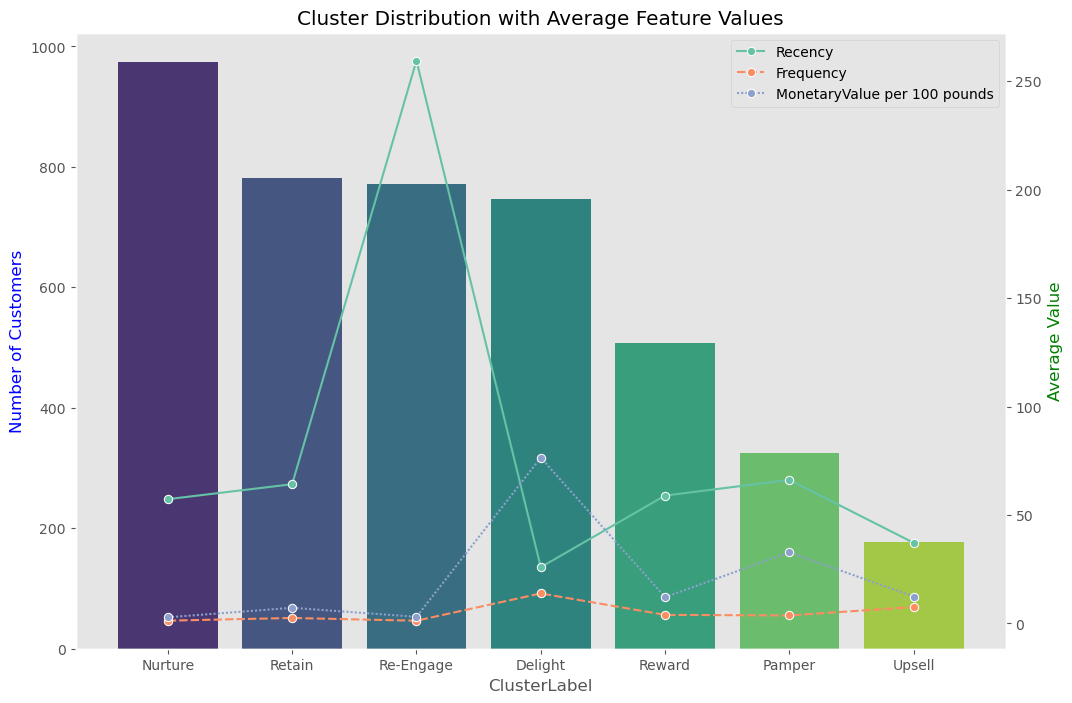

In [238]:
fig, ax1 = plt.subplots(figsize=(12,8))
sns.barplot(data=feature_means,x=cluster_counts.index,
            y=cluster_counts.values,ax=ax1,
            hue=cluster_counts.index, palette='viridis')
ax1.set_ylabel('Number of Customers',color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')
plt.grid(False, axis='y')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2',marker='o')
ax2.set_ylabel('Average Value',color='g')

plt.grid(False, axis='y') 
plt.show()